# Gradient Descent vs Newton Method
Gradient Descent

Iteration 39!
Final point: [0.00487858 0.00048786]
Final: (0.005, 0.000)


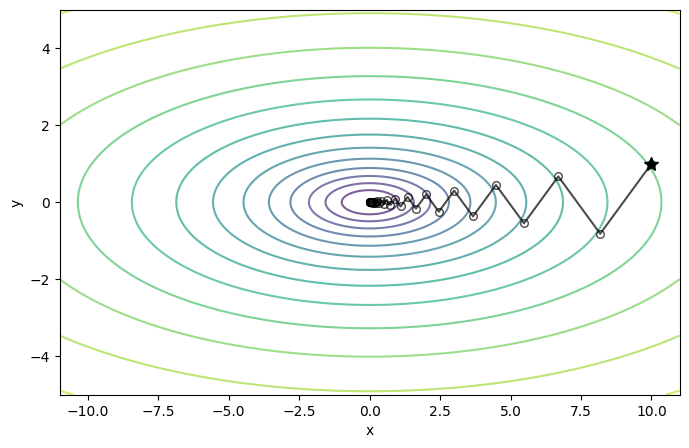

Iteration 8!
Final point: [-3.0343223e+00  5.6889653e-04]
Number of iterations: 8
Final: (-3.034, 0.001)


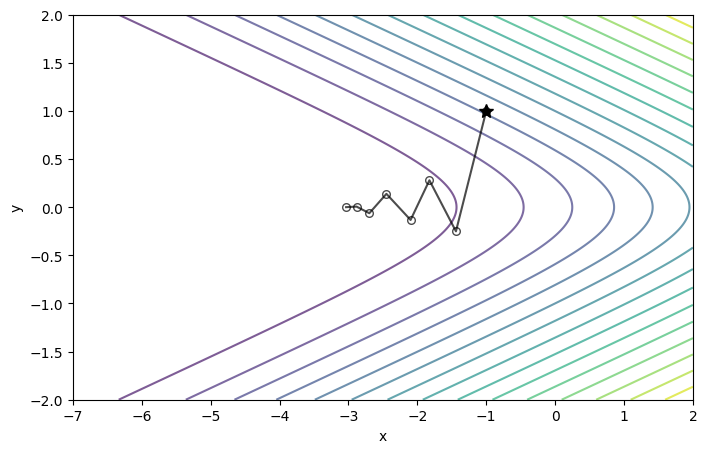

Iteration 7!
Final point: [-3.0005431e+00 -1.3239682e-04]
Number of iterations: 7
Final: (-3.001, -0.000)


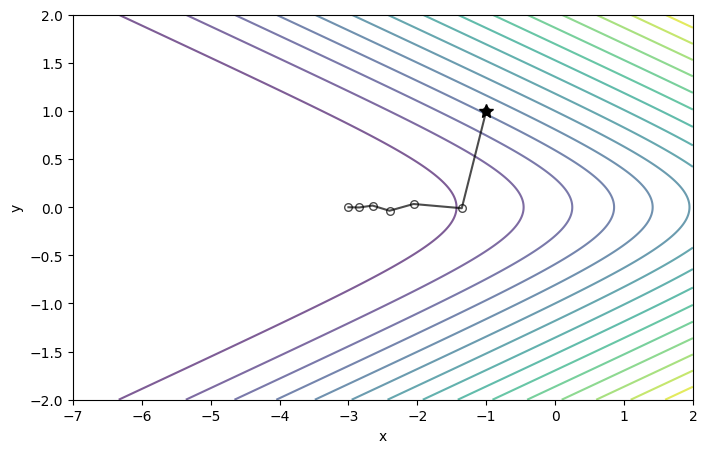

In [ ]:
import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt

def quad(x, gamma=10):
    return 1/2*(x[0]**2 + gamma*x[1]**2)

def nonquad(x):
    return jnp.exp(x[0]+3*x[1]-0.1)+jnp.exp(x[0]-3*x[1]-0.1)+jnp.exp(x[0]-0.1)

def backtracking_linesearch(f, x, delta, alpha=0.1, beta=0.5):
    t = 1.0
    grad = jax.grad(f)(x)
    while f(x + t*delta) > f(x) + alpha * t * jnp.dot(grad, delta):
        t *= beta
    return t

def exact_linesearch(f, x, delta, s_min=0, s_max=1, n_points=100):
    s_vals = jnp.linspace(s_min, s_max, n_points)
    f_vals = jax.vmap(lambda s: f(x + s * delta))(s_vals)
    return s_vals[jnp.argmin(f_vals)]

def gradient_descent(f, x0,
                     linesearch=exact_linesearch,
                     n_iter=100,
                     tol=1e-3):
    x = x0
    path = [x0]
    for i in range(n_iter):
        grad = jax.grad(f)(x)
        delta = -grad
        t = linesearch(f, x, delta)
        x_new = x + t * delta
        if jnp.linalg.norm(x_new - x, -jnp.inf) < tol:
            print(f"Iteration {i+1}!")
            break
        x = x_new 
        path.append(x)
    return jnp.array(path)

def plot_contour_with_path(f, path, 
                           x_range=(-10, 10), 
                           y_range=(-10, 10), 
                           n_points=500):
    x_vals = np.linspace(x_range[0], x_range[1], n_points)
    y_vals = np.linspace(y_range[0], y_range[1], n_points)
    X, Y = np.meshgrid(x_vals, y_vals)

    points = jnp.stack([X.ravel(), Y.ravel()], axis=1)
    Z = jax.vmap(f)(points).reshape(X.shape)

    plt.figure(figsize=(8, 5))
    plt.contour(X, Y, np.log1p(Z), levels=15, alpha=0.7)

    plt.plot(path[:, 0], path[:, 1], '.-', color='black', alpha=0.7,
             mfc='none', mec='k', ms=11)
    plt.plot(path[0, 0], path[0, 1], 'k*', markersize=10)

    plt.xlabel('x')
    plt.ylabel('y')
    print(f'Final: ({path[-1, 0]:.3f}, {path[-1, 1]:.3f})')
    plt.show()



x_q0 = jnp.array([10.0, 1.0])
path = gradient_descent(quad, x_q0)
print("Final point:", path[-1])
plot_contour_with_path(quad, path, x_range=(-11, 11), y_range=(-5, 5))


x_nq0 = jnp.array([-1.0, 1.0])
path_backtracking = gradient_descent(nonquad, x_nq0, linesearch=backtracking_linesearch)
print("Final point:", path_backtracking[-1])
print("Number of iterations:", len(path_backtracking))
plot_contour_with_path(nonquad, path_backtracking, x_range=(-7, 2), y_range=(-2, 2))

x_nq0 = jnp.array([-1.0, 1.0])
path_exact = gradient_descent(nonquad, x_nq0, linesearch=exact_linesearch)
print("Final point:", path_exact[-1])
print("Number of iterations:", len(path_exact))
plot_contour_with_path(nonquad, path_exact, x_range=(-7, 2), y_range=(-2, 2))

Iteration 2!
Final: (0.000, 0.000)


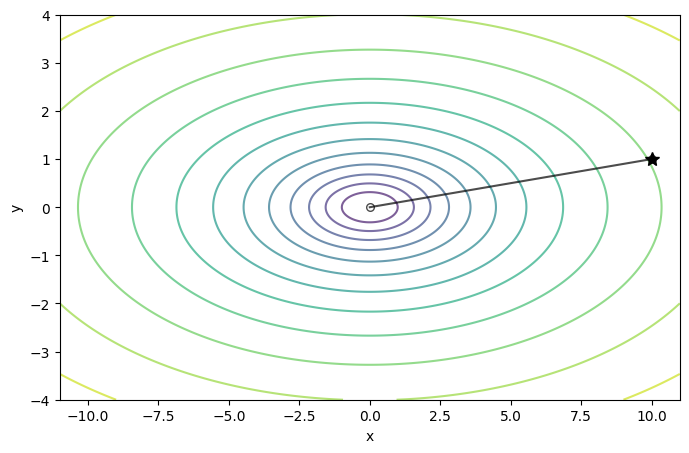

Iteration 7!
Final point: [-7.0000014  1.0000006]
Number of iterations: 7
Final: (-7.000, 1.000)


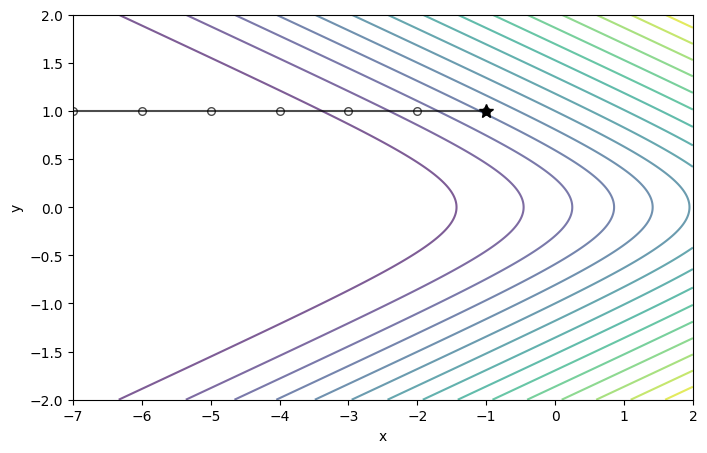

In [53]:
import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt

def newton_method(f, x0, 
                  tol=1e-2,
                  n_iters=100,
                  linesearch=backtracking_linesearch):
    x = x0
    path = [x0]
    for i in range(n_iters):
        hessian = jax.hessian(f)(x)
        grad = jax.grad(f)(x)
        x_nt = -jnp.linalg.solve(hessian, grad)
        lamb = grad @ jnp.linalg.solve(hessian, grad)

        newton_decrement = jnp.sqrt(lamb)
        if newton_decrement**2/2 <= tol:
            print(f"Iteration {i+1}!")
            break
        t = linesearch(f, x, x_nt)
        x = x + t * x_nt
        path.append(x)
    return jnp.array(path)

x_q0 = jnp.array([10.0, 1.0])
path = newton_method(quad, x_q0)
plot_contour_with_path(quad, path, x_range=(-11, 11), y_range=(-4, 4))


x_nq0 = jnp.array([-1.0, 1.0])
path_backtracking = newton_method(nonquad, x_nq0, linesearch=backtracking_linesearch)
print("Final point:", path_backtracking[-1])
print("Number of iterations:", len(path_backtracking))
plot_contour_with_path(nonquad, path_backtracking, x_range=(-7, 2), y_range=(-2, 2))

# Exercises


Iteration with decrement 5!
Iteration with decrement 7!
Iteration with decrement 8!


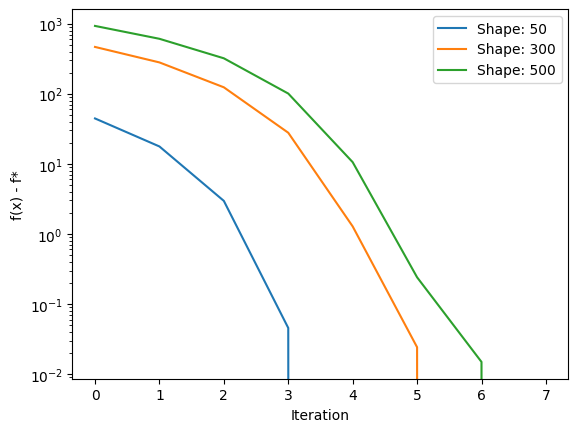

Iteration with norm 6!
Iteration with norm 9!
Iteration with norm 10!


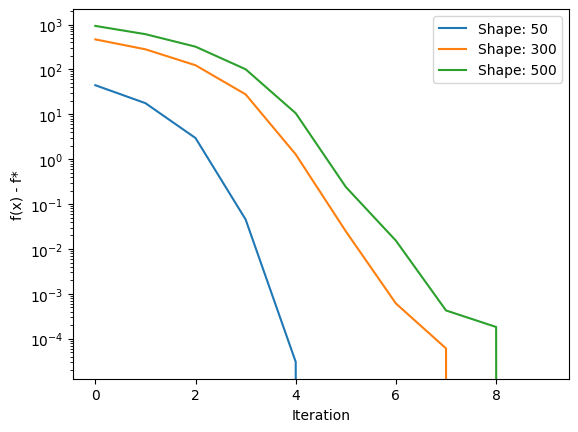

In [53]:
import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt
# --- Exercise 9.30 ---
def newton_method(f, x0, 
                  tol=1e-3,
                  n_iters=200,
                  linesearch=backtracking_linesearch,
                  criterion='decrement',):
    x = x0
    path = [x0]
    for i in range(n_iters):
        hessian = jax.hessian(f)(x)
        grad = jax.grad(f)(x)
        x_nt = -jnp.linalg.solve(hessian, grad)
        lamb = grad @ jnp.linalg.solve(hessian, grad)
        if criterion == 'decrement':
            newton_decrement = jnp.sqrt(lamb)
            if newton_decrement**2/2 <= tol:
                print(f"Iteration with decrement {i+1}!")
                break
        if criterion == 'norm':
            if jnp.linalg.norm(grad) <= tol:
                print(f"Iteration with norm {i+1}!")
                break
        t = linesearch(f, x, x_nt)
        x = x + t * x_nt
        path.append(x)
    return jnp.array(path)

def loglog(x):
    '''Log-barrier function'''
    f = -jnp.sum(jnp.log(1 - a.T @ x))
    f -= jnp.sum(jnp.log(1 - x**2))
    return f

def plot_error(f, path):
    f_opt = f(path[-1, :])  # best approximation
    A = np.zeros(len(path))
    for i in range(len(path)):
        A[i] = f(path[i, :]) - f_opt
    plt.plot(range(len(path)), A,
                label=f"Shape: {path.shape[1]}")
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("f(x) - f*")
    plt.legend()

key = jax.random.key(17)
for i, j in ((50, 60), (300, 300), (500, 500)):
    n, m = i, j
    a = jax.random.normal(key, shape=(n, m))
    x0 = jnp.full(shape=n, fill_value=0.0)
    path = newton_method(loglog, x0)
    plot_error(loglog, path)

plt.show()

for i, j in ((50, 60), (300, 300), (500, 500)):
    n, m = i, j
    a = jax.random.normal(key, shape=(n, m))
    x0 = jnp.full(shape=n, fill_value=0.0)
    path = newton_method(loglog, x0, criterion='norm')
    plot_error(loglog, path)

plt.show()